# Trabajo integrador - Parte 2

# Aprendizaje Supervisado

**Nombre**:

## Problema de regresión

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [14]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers

### Ejemplo de uso

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Vamos a crear un dataset primero.

data = generate_dataset(
    n_samples=1000,
    n_features=5,
    n_informative=2,
    n_targets=1,
    noise=0,
    output='dataframe'
)

## esto nos genera un dataset que contiene 5 features, 2 de los cuales son informativos, y 1 target.

data.head()

,x0,x1,x2,x3,x4,target
0,0.709803,0.570947,-1.526617,-1.402784,0.215258,53.994092
1,-0.177518,0.362238,0.267468,0.459683,0.341783,-1.621789
2,0.134969,-2.075827,0.647139,1.067732,0.933862,-41.125425
3,-0.196789,-0.900144,-1.086272,-1.410796,1.001968,-32.423171
4,-0.016137,0.116710,1.485616,1.067162,1.446783,1.823700


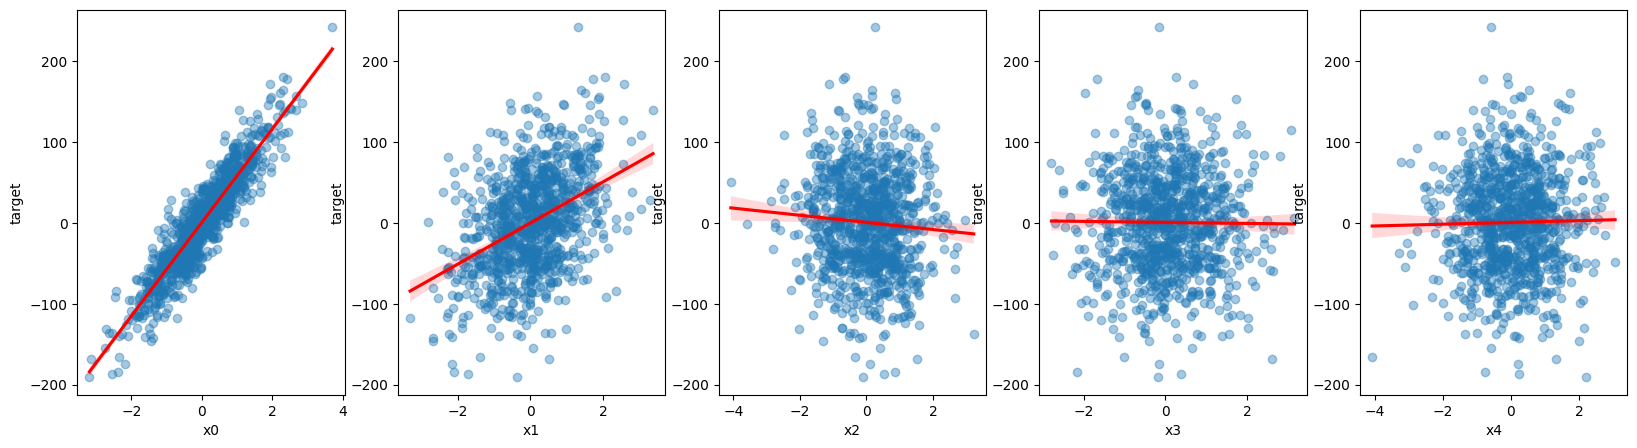

In [6]:
## vamos a visualizar estas variables
## creamos una figura de matplotlib que contenga 5 subplots, uno por cada feature:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

## Creamos un loop para iterar sobre cada feature y graficar la regresión lineal entre cada feature y el target:

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)
    


Ahora agregamos _outliers_ a un nuevo dataset

In [18]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0,
    output='dataframe'
)

In [19]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False,
)
do2 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=True,
)
do3 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=False,
)

Text(0.5, 1.0, 'Outliers (one-tailed)')

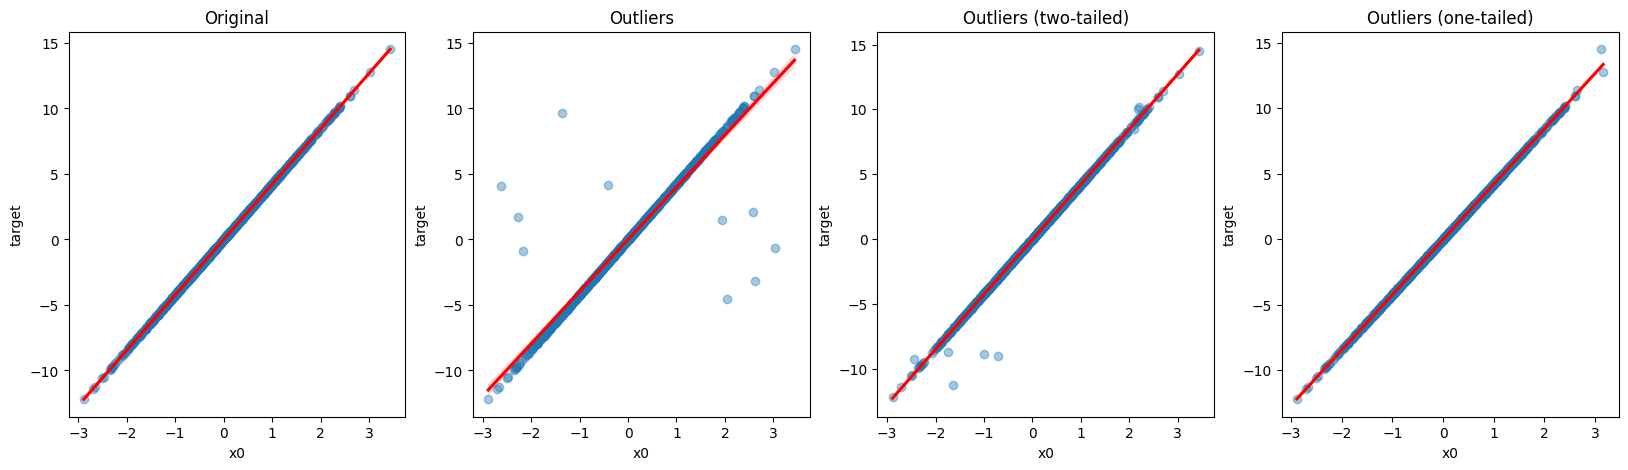

In [20]:
## vamos a visualizar estas los distintos datasets

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

sns.regplot(x='x0',
            y='target',
            data=do2,
            ax=axes[2],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[2].set_title('Outliers (two-tailed)')

sns.regplot(x='x0',
            y='target',
            data=do3,
            ax=axes[3],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[3].set_title('Outliers (one-tailed)')


Text(0.5, 1.0, 'Outliers')

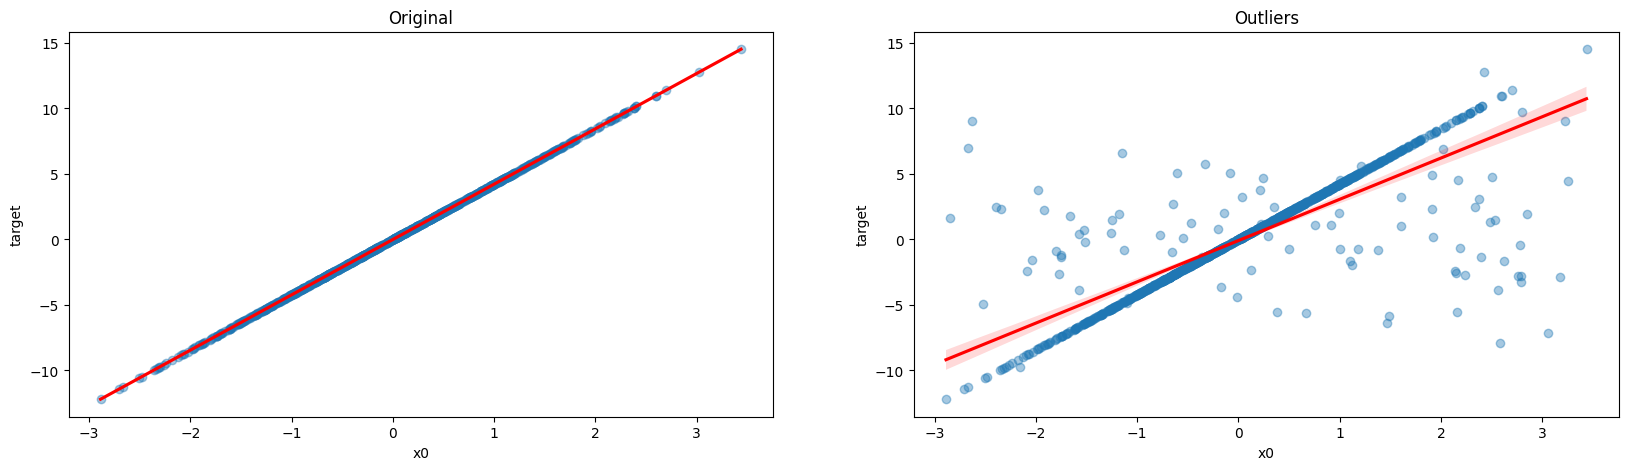

In [21]:
## y si lo queremos con mucho mas outliers?

doe = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True)

## vamos a visualizar este caso

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=doe,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')


### Ejercicio 4

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Dado un valor de _noise_ fijo, sin fijar _random_state_ (para poder asegurarnos
que los datos que generamos son distintos) realizaremos 100 simulaciones de este dataset.

En la simulación deberemos generar el dataset, hacer una división de train-test, ajustar
un modelo de regresión lineal multivariada y validar el mismo.

En cada iteración de esta simulación debemos guardar:

- Los coeficientes de la regresión.
- El RMSE de train y test.
- El MAE de train y test. 


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

In [79]:
import numpy as np
# from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [80]:
## Parámetros de la simulación
n_exp = 100
n_samples = 1000
n_features = 10
n_informative = 2
n_targets = 1
random_state_values = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

noise = np.linspace(0, 100, 100)
bias = np.linspace(0, 100, 20)


In [96]:
i = 0
for n in noise:
    data = generate_dataset(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        n_targets=n_targets,
        noise=n,
        random_state=random.choice(random_state_values),
        output='dataframe'
    )
    X_train, X_test, y_train, y_test = train_test_split(data.x0.values.reshape(-1,1), data.target.values.reshape(-1,1),
                                                        train_size=0.8,
                                                        random_state=random.choice(random_state_values), shuffle=True)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    # Train the model using the training sets
    regr.fit(X = X_train.reshape(-1, 1), y = y_train)
    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    print("Noice: ", n)
    print("X test: ", X_test[0])
    print("y test: ", y_test[0])
    print("Prediction: ", y_pred[0])

    # The coefficients
    print("Coefficients: ", regr.coef_)
    # The mean squared error
    print("Mean squared error: ", mean_squared_error(y_test, y_pred))
    # The mean absolute error 
    print("Mean absolute error : ", mean_absolute_error(y_test, y_pred))
    
## Esqueleto de la simulación
##for _ in tqdm(range(n_exp)):
##    for b in bias:
##        for n in noise:
##            data = generate_dataset(
##                n_samples=n_samples,
##                n_features=n_features,
##                n_informative=n_informative,
##                n_targets=n_targets,
##                noise=n,
##                bias=b,
##                output='dataframe'
##            )
##            ...


Noice:  0.0
X test:  [-0.6402033]
y test:  [-72.71398762]
Prediction:  [-39.22460418]
Coefficients:  [[65.12516898]]
Mean squared error:  4792.839287502217
Mean absolute error :  54.21535678063616
Noice:  1.0101010101010102
X test:  [1.14969819]
y test:  [27.09439319]
Prediction:  [14.81604842]
Coefficients:  [[12.62822342]]
Mean squared error:  96.9990164549968
Mean absolute error :  7.852223815865412
Noice:  2.0202020202020203
X test:  [-0.64454638]
y test:  [-11.176237]
Prediction:  [-9.82533672]
Coefficients:  [[16.03804454]]
Mean squared error:  1977.4332053944631
Mean absolute error :  36.03675632541603
Noice:  3.0303030303030303
X test:  [-0.0687507]
y test:  [-16.65498365]
Prediction:  [-0.49370687]
Coefficients:  [[41.33946686]]
Mean squared error:  3245.327939816321
Mean absolute error :  44.55245358768068
Noice:  4.040404040404041
X test:  [-0.6528838]
y test:  [-8.13480155]
Prediction:  [-8.08583401]
Coefficients:  [[12.79043621]]
Mean squared error:  111.44665583928001
Mea

### Ejercicio 5


Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con `noise` fijo en 0.5.
2. Generamos outliers fijando `extreme_outliers`.
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

Los modelos a utilizar en este problema son:

    - Regresion Lineal simple
    - Regresion de Huber
    - Regresión Ridge

In [ ]:
from sklearn.linear_model import LinearRegression, HuberRegressor, RidgeCV

## Problema de Clasificación

### Ejercicio 6

TBD

### Ejercicio 7

TBD